In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [31]:
#SVM for non-linearly seperable data
class SVM:
    
    def __init__(self,X,y,learningRate = 0.00001, 
                 lamdaParam = 0.001, nIters = 100):
        
        self.X=X
        self.y=y
        self.learningRate=learningRate
        self.lamdaParam=lamdaParam
        self.nIters=nIters
    
    def fit(self, X, y):

        nSamples, nFeatures = X.shape

        self.w = np.zeros(nFeatures)
        self.b = 0

        for _ in range(self.nIters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) + self.b) >= 1

                if condition:
                    self.w -= self.learningRate * (2 * self.lamdaParam * self.w)
                else:
                    self.w -= self.learningRate * (2 * self.lamdaParam * self.w - y[idx] * x_i)
                    self.b -= self.learningRate * (-y[idx])

    def predict(self, X):
        """Function to predict"""
        approx = np.dot(X, self.w) + self.b
        
        return np.sign(approx)


In [27]:
#Data prep
df=pd.read_excel('sample.xlsx')
df.head()

,feature1,feature2,class
0,12,2,1
1,12,4,0
2,9,5,0
3,8,6,0
4,9,7,1


In [28]:
#Dividing the data into Features and Labels
X=np.array(df[['feature1','feature2']])
y=np.array(df[['class']])
y=y.ravel()

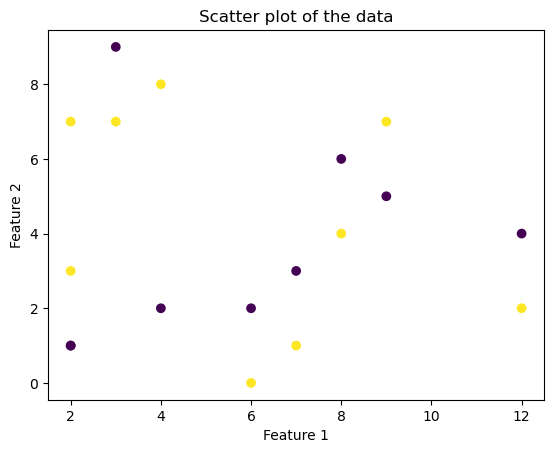

In [29]:
#Visulaizing the data to check if it is linearly seperable
plt.scatter(df['feature1'], df['feature2'], c=df['class'])
plt.title('Scatter plot of the data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [32]:
clf = SVM(X, y)

clf.fit(X, y)

print(clf.w)

[0.05299904 0.0389993 ]


In [ ]:
#this is just for working on the code and understanding the fundamentals of SVM, in reality, the data is not so simple and needs to be preprocessed